In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_us_donations_2024.csv")
df.head()

,Donor Name,Email,Phone,Donation Amount (USD),Donation Type,Project,Date,Location,Payment Method,Notes,Month
0,Grace Foster,carloconnell@example.com,13989717117,3493.24,Zakat,Orphan Children,2024-06-05,"New Rachel, North Carolina",Bank Transfer,Before method edge hand.,6
1,Seth Jackson,george37@example.org,18857124596,806.16,Sadaqah,Feed The Hungry,2024-12-22,"Carterchester, California",Bank Transfer,Face final month college improve analysis seve...,12
2,Kimberly Morrison,cynthiali@example.com,13306537445,2176.76,Fidya,Medical Aid,2024-10-13,"Princeborough, Georgia",Apple Pay,Her dream feeling player.,10
3,Michael Davis,jeffrey04@example.net,19357583995,1510.32,Fidya,Orphan Children,2024-03-11,"South Thomas, New York",Paypal,Sing know newspaper.,3
4,Michael Rojas,wrightjustin@example.org,12482146024,4246.96,Qurbani,Homeless Shelter,2024-06-07,"New Joseph, California",Bank Transfer,Mr dog simple laugh especially during mention.,6


In [3]:
amount_col = [col for col in df.columns if "donation amount" in col.lower()][0]

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Monthly Donation Trend

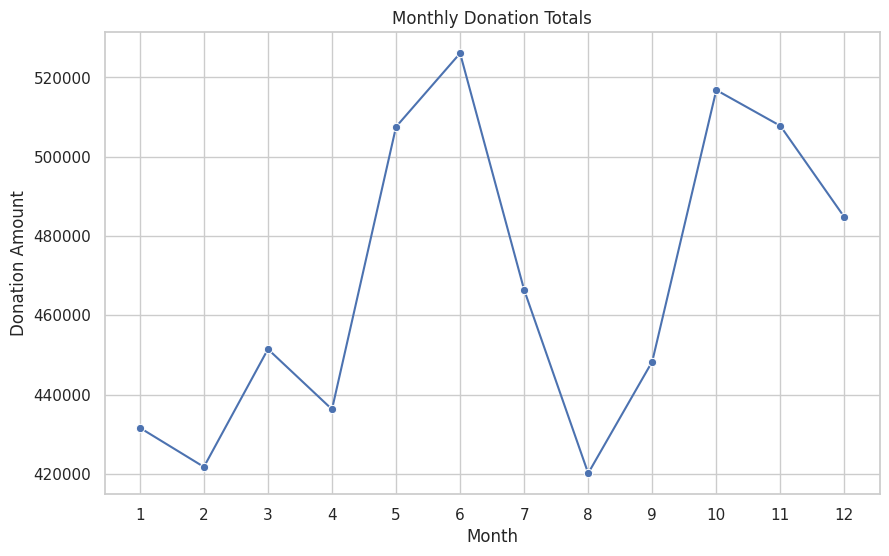

In [4]:
monthly = df.groupby('Month')[amount_col].sum().reset_index()
sns.lineplot(data=monthly, x='Month', y=amount_col, marker='o')
plt.title("Monthly Donation Totals")
plt.ylabel("Donation Amount")
plt.xticks(range(1, 13))
plt.show()

# Donation Amount Distribution

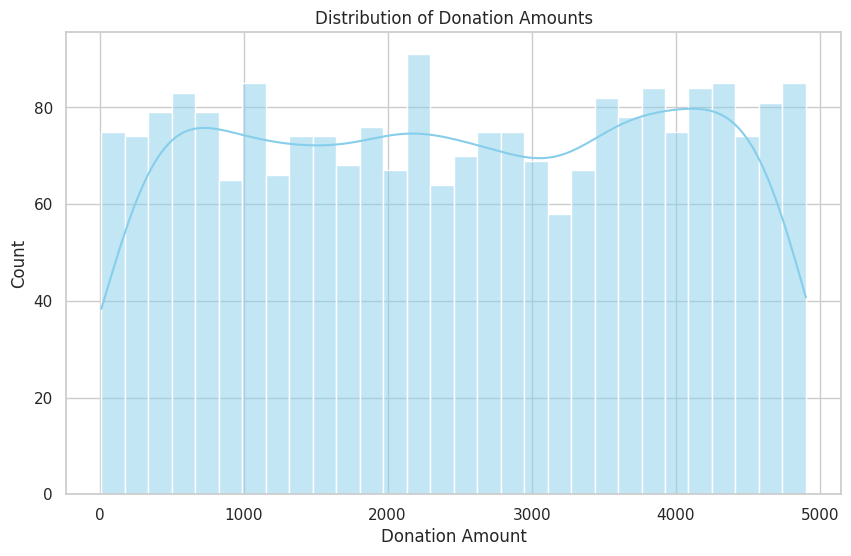

In [5]:
sns.histplot(df[amount_col], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Donation Amounts")
plt.xlabel("Donation Amount")
plt.show()

# Top 10 Donors

<ipython-input-6-d59cf2c1b5e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_donors.values, y=top_donors.index, palette='viridis')


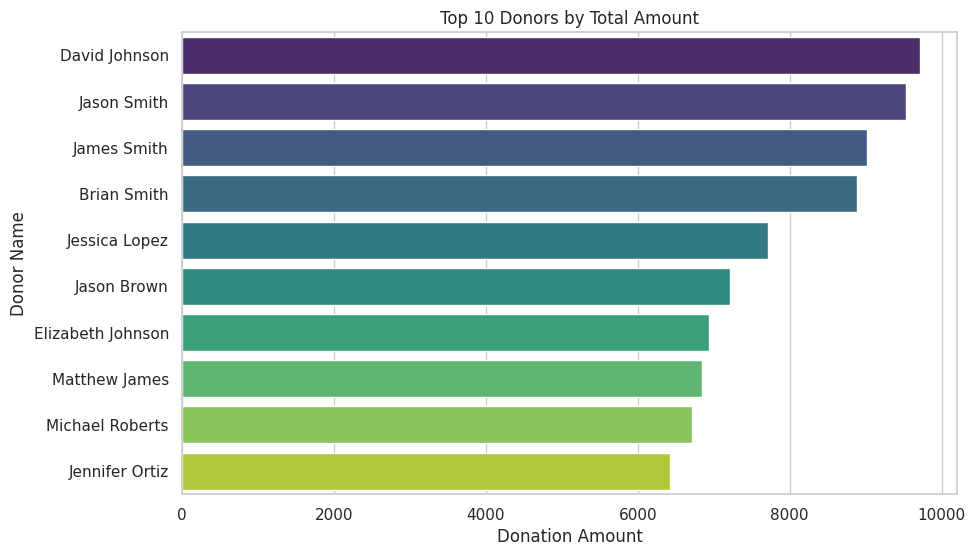

In [6]:
top_donors = df.groupby('Donor Name')[amount_col].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_donors.values, y=top_donors.index, palette='viridis')
plt.title("Top 10 Donors by Total Amount")
plt.xlabel("Donation Amount")
plt.show()

# Donation by Type

<ipython-input-7-0cac5058c7ba>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Donation Type', y=amount_col, palette='Set2')


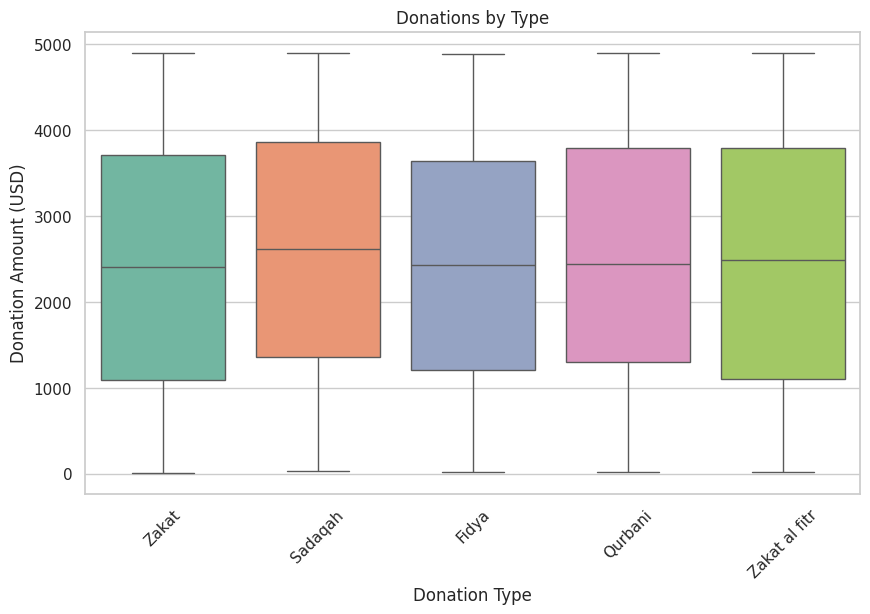

In [7]:
sns.boxplot(data=df, x='Donation Type', y=amount_col, palette='Set2')
plt.title("Donations by Type")
plt.xticks(rotation=45)
plt.show()

# Top 10 Donation Locations

<ipython-input-8-c764d25d5a73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette='coolwarm')


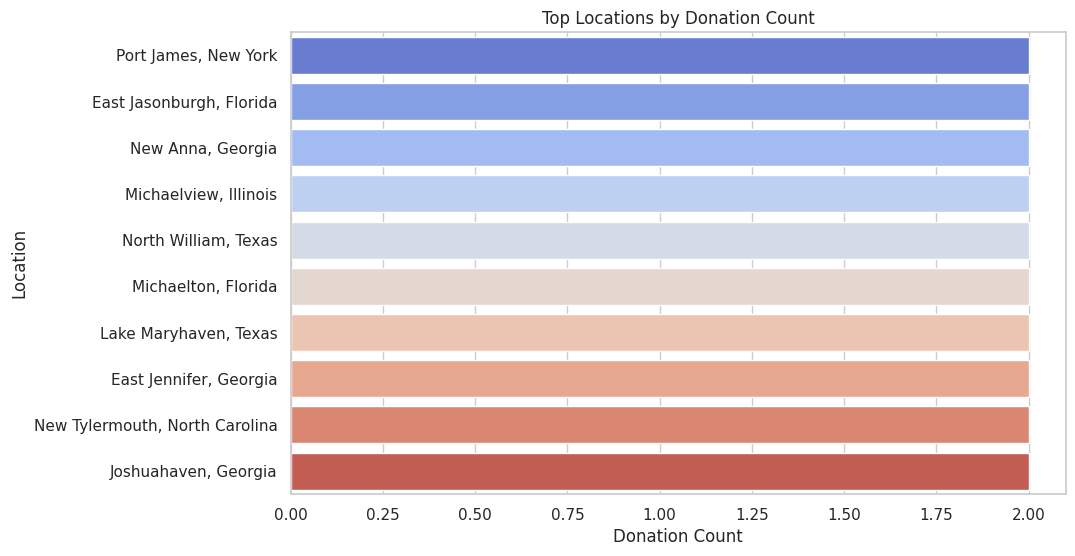

In [8]:
top_locations = df['Location'].value_counts().head(10)
sns.barplot(y=top_locations.index, x=top_locations.values, palette='coolwarm')
plt.title("Top Locations by Donation Count")
plt.xlabel("Donation Count")
plt.show()

# Payment Method Breakdown

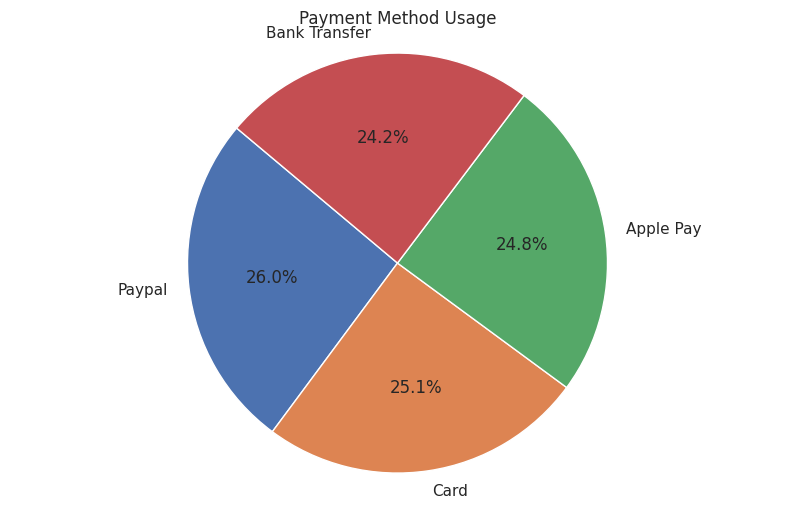

In [9]:
pm_counts = df['Payment Method'].value_counts()
plt.pie(pm_counts, labels=pm_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Payment Method Usage")
plt.axis("equal")
plt.show()

# Total Donations by Project

<ipython-input-10-a3292b43012f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proj_don.values, y=proj_don.index, palette='pastel')


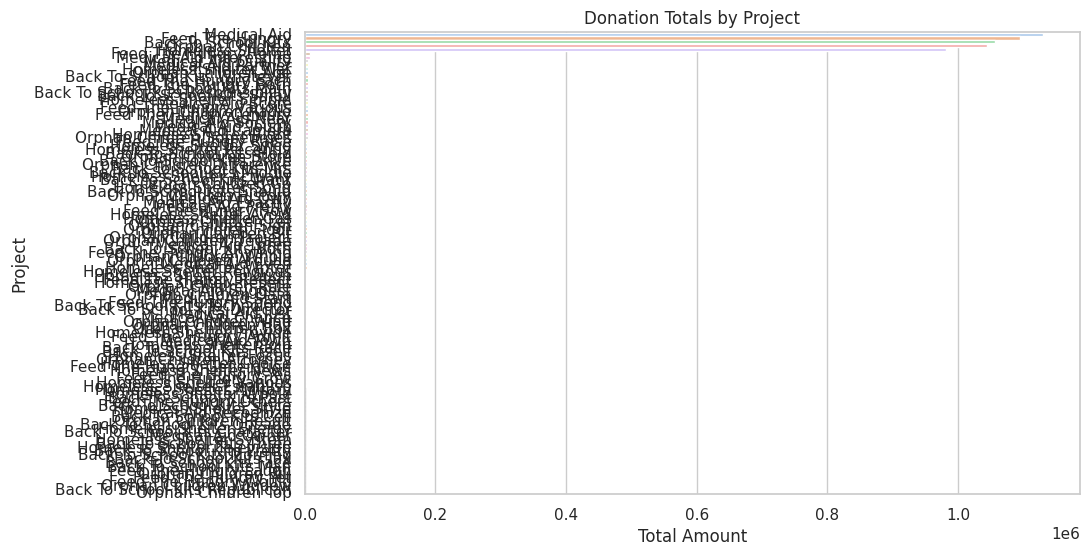

In [10]:
proj_don = df.groupby('Project')[amount_col].sum().sort_values(ascending=False)
sns.barplot(x=proj_don.values, y=proj_don.index, palette='pastel')
plt.title("Donation Totals by Project")
plt.xlabel("Total Amount")
plt.ylabel("Project")
plt.show()

# Daily Trends

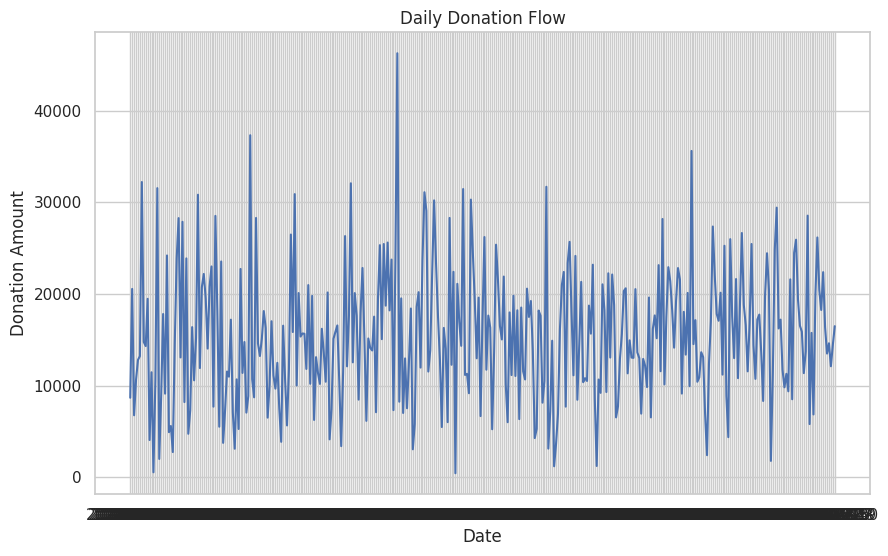

In [11]:
daily = df.groupby('Date')[amount_col].sum().reset_index()
sns.lineplot(data=daily, x='Date', y=amount_col)
plt.title("Daily Donation Flow")
plt.xlabel("Date")
plt.ylabel("Donation Amount")
plt.show()

In [12]:
donor_counts = df['Donor Name'].value_counts()
repeat_rate = (donor_counts > 1).mean()
print(f"Repeat Donor Rate: {repeat_rate:.2%}")

Repeat Donor Rate: 1.76%


In [13]:
df['Donation Tier'] = pd.qcut(df[amount_col], q=3, labels=["Low", "Medium", "High"])
tier_summary = df.groupby('Donation Tier')[amount_col].agg(['count', 'mean', 'sum'])
display(tier_summary)

<ipython-input-13-ea0d1b23f312>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_summary = df.groupby('Donation Tier')[amount_col].agg(['count', 'mean', 'sum'])


,count,mean,sum
Donation Tier,,,
Low,754,816.436379,615593.03
Medium,754,2491.509695,1878598.31
High,754,4144.555995,3124995.22


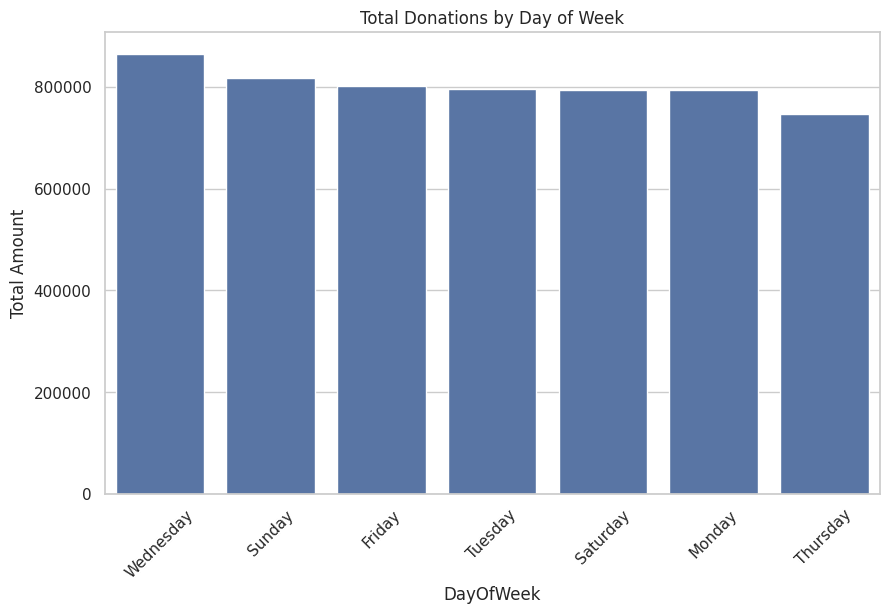

In [14]:
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.day_name()
dow = df.groupby('DayOfWeek')[amount_col].sum().sort_values(ascending=False)
sns.barplot(x=dow.index, y=dow.values)
plt.title("Total Donations by Day of Week")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.show()

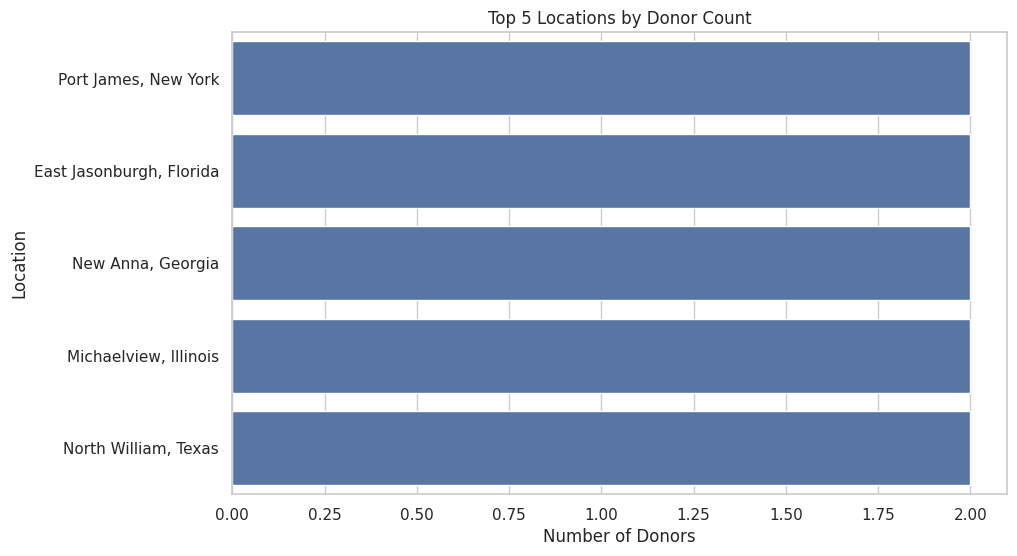

In [15]:
top_locations = df['Location'].value_counts().nlargest(5)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title("Top 5 Locations by Donor Count")
plt.xlabel("Number of Donors")
plt.show()

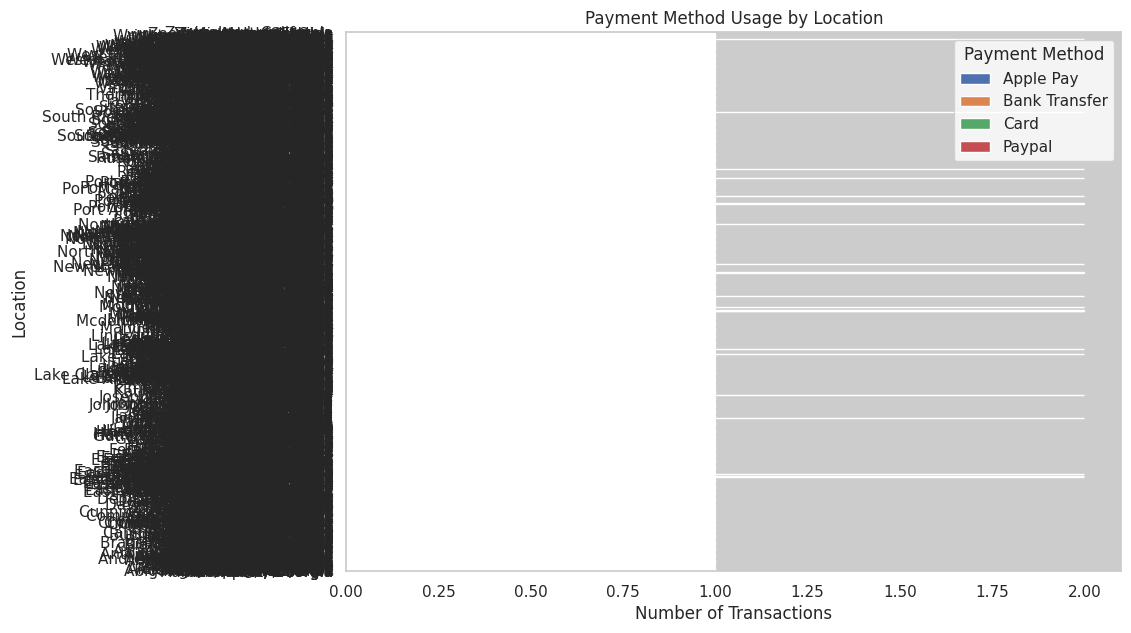

In [16]:
loc_pm = df.groupby(['Location', 'Payment Method']).size().unstack(fill_value=0)
loc_pm.plot(kind='barh', stacked=True, figsize=(10, 7))
plt.title("Payment Method Usage by Location")
plt.xlabel("Number of Transactions")
plt.show()

<ipython-input-17-b5838fd04c7b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_projects.values, y=top_projects.index, palette='Greens')


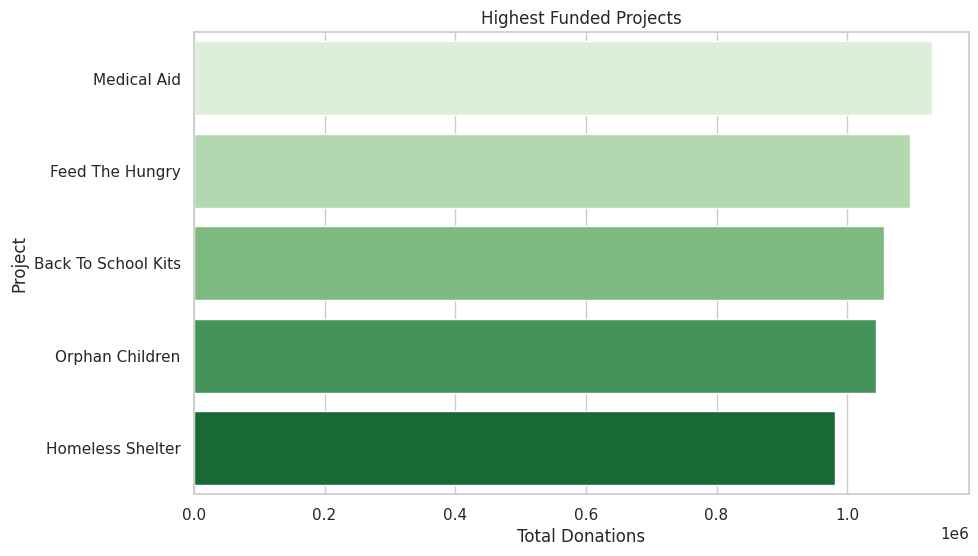

In [17]:
top_projects = df.groupby('Project')[amount_col].sum().sort_values(ascending=False).head(5)
sns.barplot(x=top_projects.values, y=top_projects.index, palette='Greens')
plt.title("Highest Funded Projects")
plt.xlabel("Total Donations")
plt.ylabel("Project")
plt.show()

<ipython-input-18-f17bbc5bc89e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  persona = df.groupby(['Donation Tier', 'Payment Method']).size().unstack().fillna(0)


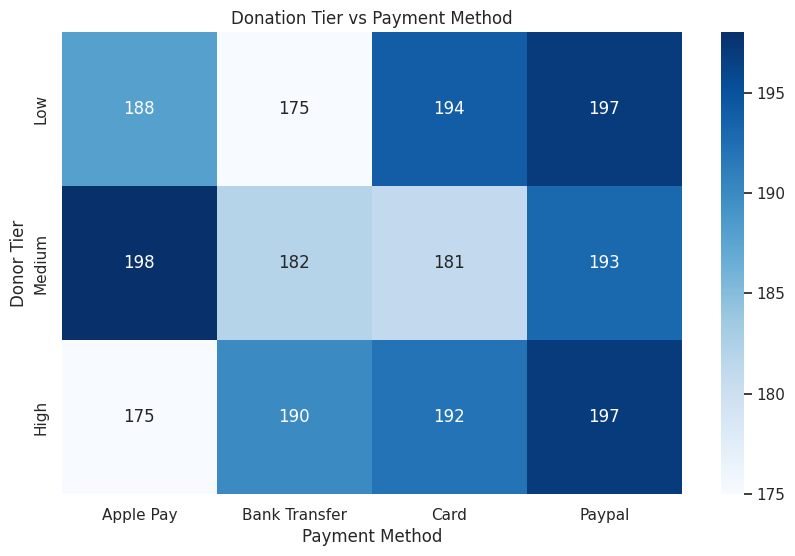

In [18]:
persona = df.groupby(['Donation Tier', 'Payment Method']).size().unstack().fillna(0)
sns.heatmap(persona, annot=True, fmt='g', cmap='Blues')
plt.title("Donation Tier vs Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Donor Tier")
plt.show()

In [19]:
donation_counts = df['Donor Name'].value_counts()
regular_donors = donation_counts[donation_counts > 1].index.tolist()
regular_df = df[df['Donor Name'].isin(regular_donors)]
summary = regular_df.groupby('Donor Name')[amount_col].agg(['count', 'sum', 'mean']).sort_values(by='count', ascending=False)
summary.columns = ['Donation Count', 'Total Donated', 'Average Donation']
display(summary.head(10))

,Donation Count,Total Donated,Average Donation
Donor Name,,,
Brian Smith,3,8888.23,2962.743333
Michael Davis,3,6053.02,2017.673333
Jason Smith,3,9536.65,3178.883333
James Martin,3,2116.58,705.526667
James Smith,3,9020.34,3006.780000
Elizabeth Johnson,3,6935.33,2311.776667
David Johnson,3,9718.52,3239.506667
Christine Smith,2,2399.56,1199.780000
Charles Smith,2,1477.31,738.655000
